# Проект Принятие решений в бизнесе на основе данных

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1 

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br>
<br>**Задача**<br>
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.<br>
<br>**Задача**<br>
<br>Проанализируйте A/B-тест:<br>
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и - предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Решение

Изучим файлы

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
hypothesis = pd.read_csv(
    '/Users/dmitriybobyr/Desktop/Практикум/Проекты/Проект Принятие решений в бизнесе на основе данных/hypothesis.csv')
orders = pd.read_csv(
    '/Users/dmitriybobyr/Desktop/Практикум/Проекты/Проект Принятие решений в бизнесе на основе данных/orders.csv')
visitors = pd.read_csv(
    '/Users/dmitriybobyr/Desktop/Практикум/Проекты/Проект Принятие решений в бизнесе на основе данных/visitors.csv')

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


#### Часть 1

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Фреймворк RICE состоит из четырёх компонент:<br>
<br>**Reach** — скольких пользователей затронет изменение, которое вы хотите внести;<br>
**Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>
**Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;<br>
**Efforts** — сколько стоит протестировать эту гипотезу.<br>
ICE = (impact * confidence) / efforts<br>
RICE = (reach * impact * confidence) / efforts

In [6]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis[
    'impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6. По RICE: 7, 2, 0, 6. Гипотеза №7 была на 3м месте по методу ICE, но так как ее показатель reach = 10, в методе RICE она вырывается на первое место.

### Часть 2

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [8]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Предобработка данных

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Нет ненулевых, пропущенных значений. Данные приведены к нормальным типам. С этим все ок.

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные такжи приведены к нужному типу, пропущенных значений и нулей нет.

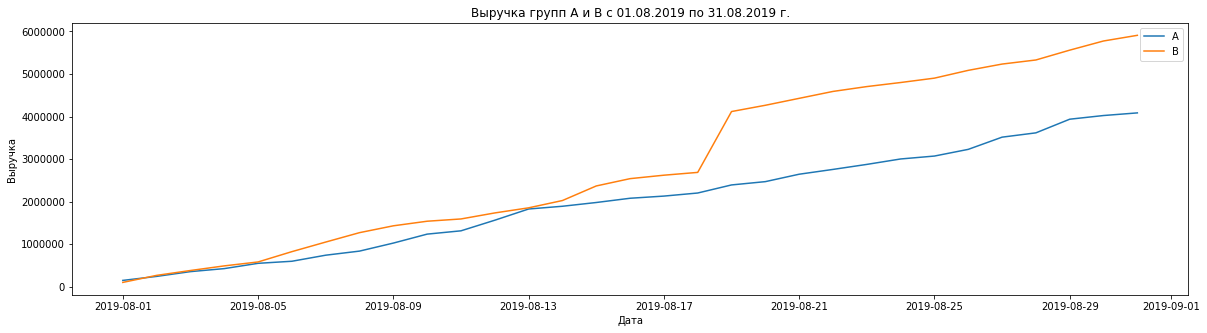

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'transactionId' : pd.Series.nunique, 
    'visitorId' : pd.Series.nunique, 
    'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativedata = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativedata.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и В
cumulativeRevenueA = cumulativedata[cumulativedata['group']=='A'][['date', 'revenue', 'transactions']]
cumulativeRevenueB = cumulativedata[cumulativedata['group']=='B'][['date', 'revenue', 'transactions']]

plt.figure(figsize=(20, 5))
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title("Выручка групп А и В с 01.08.2019 по 31.08.2019 г.")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

Сегмент В на протяжении всего теста лидировал, также ближе к середине теста заметен резкий скачок. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

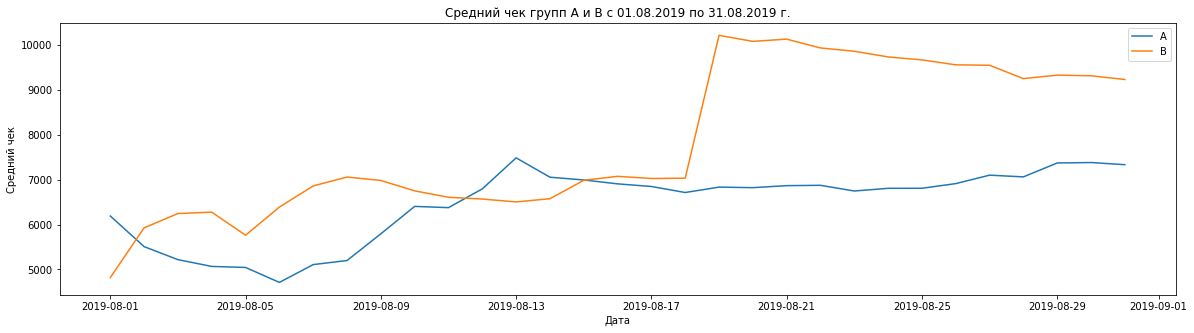

In [12]:
# графики среднего чека по группам — деление кумулятивной выручки на кумулятивное число заказов
plt.figure(figsize=(20, 5))
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.title("Средний чек групп А и В с 01.08.2019 по 31.08.2019 г.")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']\
         /cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']\
         /cumulativeRevenueB['transactions'], label='B')
plt.legend();

Кумулятивное значение среднего чека у сегмента В выше практически на протяжении всего теста, и также есть резкие скачки.<br>Скачок в среднем чеке может быть вызван аномальным по стоимости заказом, то есть выбросом. После скачка средний чек находится в районе 900 и медленно падает. Возможно товар был хорошо прорекламирован, либо запустилась маркетинговая акция.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

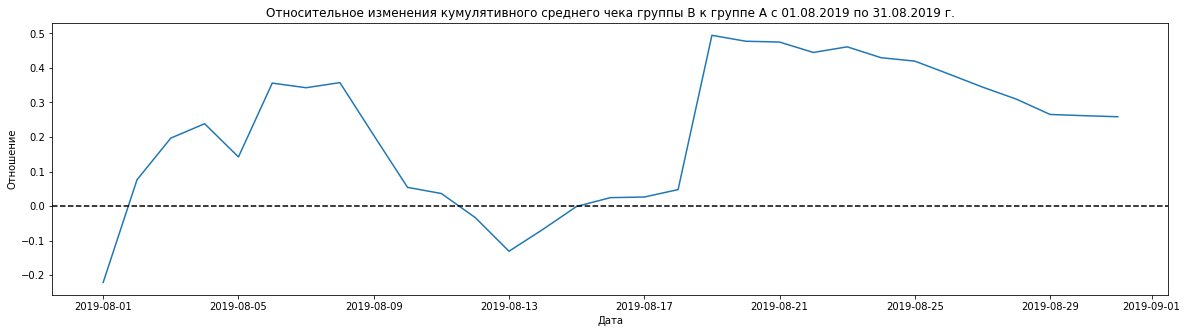

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(20, 5))
plt.xlabel("Дата")
plt.ylabel("Отношение")
plt.title("Относительное изменения кумулятивного среднего чека группы B к группе A с 01.08.2019 по 31.08.2019 г.")
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']\
                                  /mergedCumulativeRevenue['transactionsB'])\
                                 /(mergedCumulativeRevenue['revenueA']\
                                  /mergedCumulativeRevenue['transactionsA']) - 1);
plt.axhline(y=0, color='black', linestyle='--');

Результаты теста резко менялись в несколько дат, скорее всего тогда были совершены аномальные заказы.

4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

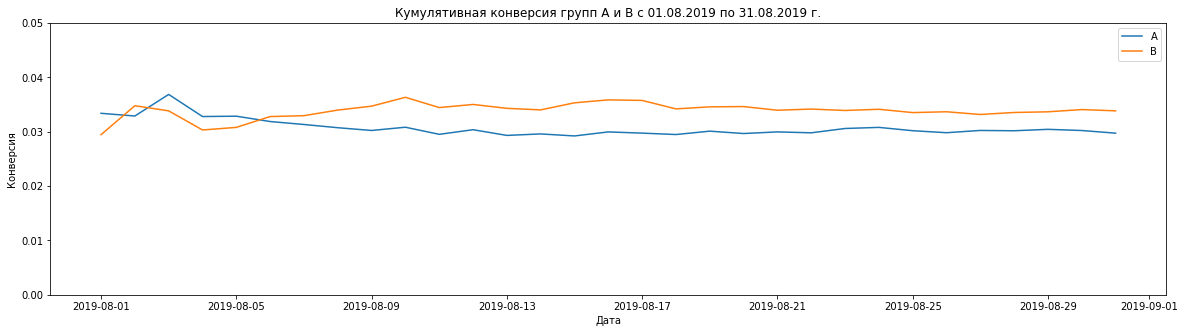

In [14]:
# считаем кумулятивную конверсию
cumulativedata['conversion'] = cumulativedata['transactions'] / cumulativedata['visitors']

cumulativedataA = cumulativedata[cumulativedata['group']=='A']
cumulativedataB = cumulativedata[cumulativedata['group']=='B']

plt.figure(figsize=(20, 5));
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.title("Кумулятивная конверсия групп А и В с 01.08.2019 по 31.08.2019 г.")
plt.plot(cumulativedataA['date'], cumulativedataA['conversion'], label='A')
plt.plot(cumulativedataB['date'], cumulativedataB['conversion'], label='B')
plt.legend();
plt.ylim([0, 0.05]);

В начале сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А. Если смотреть на график без масштаба, будет казаться, что колебания до сих пор продолжаются.

5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и - предположения.

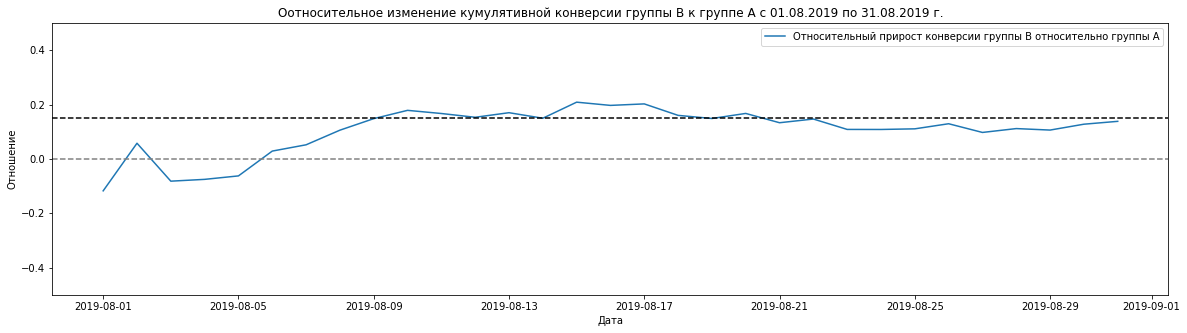

In [15]:
mergedCumulativeConversions = cumulativedataA[['date','conversion']].\
merge(cumulativedataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 5));
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();
plt.xlabel("Дата")
plt.ylabel("Отношение")
plt.title("Оотносительное изменение кумулятивной конверсии группы B к группе A с 01.08.2019 по 31.08.2019 г.")
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.15, color='black', linestyle='--')
plt.ylim([-0.5, 0.5]);

На 5 день теста группа В лидирует по конверсии и фиксируется около значения в 15%.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

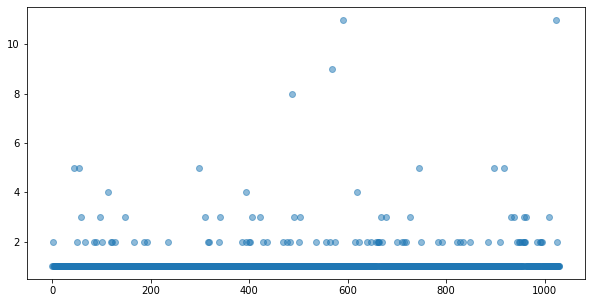

In [16]:
ordersByVisitors = orders.drop(['date', 'revenue', 'group'], axis=1).groupby('visitorId',
                                                                     as_index=False).agg({
    'transactionId' : pd.Series.nunique
})
ordersByVisitors.columns = ['visitorId', 'transactions']
ordersByVisitors.sort_values(by='transactions', ascending=False)

plt.figure(figsize=(10, 5));
x_values = pd.Series(range(0, len(ordersByVisitors)))
plt.scatter(x_values, ordersByVisitors['transactions'], alpha=0.5);

Пользователей, которые сделали больше 2-х транзакций мало. Они могут быть аномальными.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [17]:
#ordersByVisitors.sort_values(by='transactions', ascending=False)
np.percentile(ordersByVisitors['transactions'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей совершали больше 2х заказов, не более 1% - больше 4х заказов.<br>Граница для определения аномальных пользователей - больше 3 закаов.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

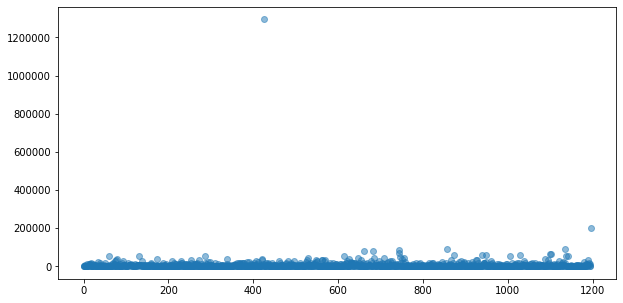

In [18]:
# orders['revenue'].hist(bins=100); распределение не нормальное
plt.figure(figsize=(10, 5));
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Есть странные стоимости заказов - 1,2 млн и 200 тысяч.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [19]:
#orders.sort_values(by='revenue', ascending=False)
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% стоимости заказов больше 28 000, не более 1% - 58 233.<br>Граница для определения аномальных заказов - больше 30 000.

10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Выдвинем гипотезу о равенстве конверсий групп А и В<br>
- **Н-0** - конверсия группы А = конверсии группы В<br><br>

Соответственно,
<br>
- **Н-1** - конверсия группы А != конверсии группы В

In [20]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsACummulative = visitorsADaily.apply(
    lambda x:visitorsADaily[visitorsADaily['date'] <= x['date']].agg({
        'date' : 'max',
        'visitorsPerDateA' : 'sum'
    }), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x:visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({
        'date' : 'max',
        'visitorsPerDateB' : 'sum'
    }), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [21]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
.groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'transactionsPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
.groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateB']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                       .agg({
    'date' : 'max',
    'transactionsPerDateA' : 'sum',
    'revenuePerDateA' : 'sum'
}), axis=1).sort_values(by='date')
ordersACummulative.columns = ['date', 'transactionsCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                       .agg({
    'date' : 'max',
    'transactionsPerDateB' : 'sum',
    'revenuePerDateB' : 'sum'
}), axis=1).sort_values(by='date')
ordersBCummulative.columns = ['date', 'transactionsCummulativeB', 'revenueCummulativeB']

In [22]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
.merge(ordersACummulative, left_on='date', right_on='date', how='left')\
.merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
.merge(visitorsADaily, left_on='date', right_on='date', how='left')\
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
.merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
.merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [23]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({
    'transactionId' : pd.Series.nunique
})
ordersByUsersA.columns = ['userId', 'transactions']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({
    'transactionId' : pd.Series.nunique
})
ordersByUsersB.columns = ['userId', 'transactions']

sampleA = pd.concat([ordersByUsersA['transactions'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
- len(ordersByUsersA['transactions'])), name='transactions')], axis=0)

sampleB = pd.concat([ordersByUsersB['transactions'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
- len(ordersByUsersB['transactions'])), name='transactions')], axis=0)

In [24]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.5f}".format(sampleB.mean()/sampleA.mean()-1))
# относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1

0.00840
0.13808


По сырым данным различий в конверсии групп А и В нет. p-value = 0.0084 больше 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Относительный выигрыш группы В = 13.8%

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Выдвинем гипотезу о равенстве среднего чека групп А и В<br>
- **Н-0** - средний чек группы А = среднему чеку группы В<br><br>

Соответственно,<br>
- **Н-1** - средний чек группы А != среднему чеку группы В

In [25]:
print("{0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))

print("{0:.5f}".format(orders[orders['group']=='B']['revenue'].mean()\
                       /orders[orders['group']=='A']['revenue'].mean()-1))

0.36465
0.25871


p-value значительно больше 0.05, следовательно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы В значительно выше среднего чека группы А.

12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Выдвинем гипотезу о равенстве конверсий по очищенным данным групп А и В<br>
- **Н-0** - конверсия группы А = конверсии группы В<br><br>

Соответственно,
<br>
- **Н-1** - конверсия группы А != конверсии группы В

In [26]:
usersWithManyTransactions = pd.concat([ordersByUsersA[ordersByUsersA['transactions'] > 2]['userId'],\
ordersByUsersB[ordersByUsersB['transactions'] > 2]['userId']], axis=0)

usersWithExpensiveTransactions = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyTransactions, usersWithExpensiveTransactions], axis=0)\
.drop_duplicates().sort_values()
# abnormalUsers.shape - 68 аномальных пользователей

In [27]:
# считаем стат. значимость различий в конверсии между группами теста по очищенным данным
sampleAFiltered = pd.concat(
[ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['transactions'], \
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])),\
         name='orders')], axis=0
)

sampleBFiltered = pd.concat(
[ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['transactions'], \
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])),\
         name='orders')], axis=0
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.5f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00667
0.17155


По очищенным данным различий в конверсии групп А и В также нет. Сегмент В значительно лучше сегмента А.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Выдвинем гипотезу о равенстве среднего чека по очищенным данным групп А и В<br>
- **Н-0** - средний чек группы А = среднему чеку группы В<br><br>

Соответственно,<br>
- **Н-1** - средний чек группы А != среднему чеку группы В

In [28]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

0.360
-0.023


P-value увеличился и разница между сегментами сократилась с 25% до -2%. То есть, различий в средних чеках по очищенным данным также нет, мы убрали аномалии, которые существенно повлияли на результат, вследствие чего средний чек у сегмента В стал меньше, чем у А.

14. Примите решение по результатам теста и объясните его. <br><br>**Варианты решений**:<br>
<br>1. Остановить тест, зафиксировать победу одной из групп. <br>2. Остановить тест, зафиксировать отсутствие различий между группами. <br>3. Продолжить тест.

**Итого**:
1. Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий.
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
4. График различия среднего чека говорит о том, что результаты группы B улучшаются с 5го дня тестирования и зафиксировались около 15%.
<br><br>Получается, тест можно останавливать и зафиксировать победу группы В

## Общий вывод

Рассмотрели гипотезы по методам ICE и RICE. Победила гипотеза **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**, так как она имеет значительный охват пользователей.<br>Так же после проведенного А/В теста длинной в месяц, проанализировавав сырые и очищенные данные, пришел к выводу, что тест **можно закончить и зафиксировать победу группы В**.